,Date,Total_Aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passenger_Fatalities,Crew_Fatalities,Ground_Fatalities
count,5008,4991.0,4787.0,4789.0,5000.0,4773.0,4773.0,4964.0
mean,1971-05-14 09:57:13.226837072,31.121218,26.877376,4.519524,22.294,18.940708,3.587262,1.718372
min,1908-09-17 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1951-05-07 12:00:00,7.0,3.0,2.0,4.0,1.0,2.0,0.0
50%,1970-09-02 12:00:00,16.0,12.0,4.0,11.0,7.0,3.0,0.0
75%,1992-03-22 12:00:00,35.0,30.0,6.0,25.0,21.0,5.0,0.0
max,2021-07-06 00:00:00,644.0,614.0,83.0,583.0,560.0,43.0,2750.0
std,NaN,45.479965,44.035342,3.758072,35.000385,34.06519,3.177315,55.495544


<Axes: xlabel='Operator'>

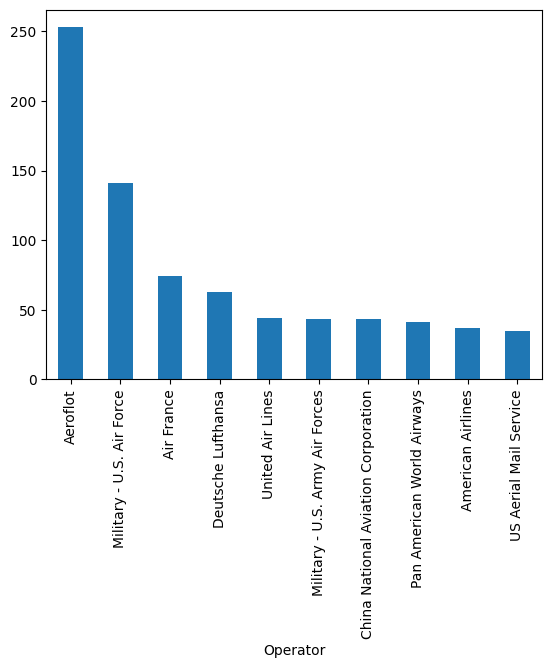

In [ ]:
# Estadísticas descriptivas
display(df_accidentes.describe())

# Distribución de una variable categórica, por ejemplo, 'Operator'
df_accidentes['Operator'].value_counts().head(10).plot(kind='bar')


<Axes: xlabel='Year'>

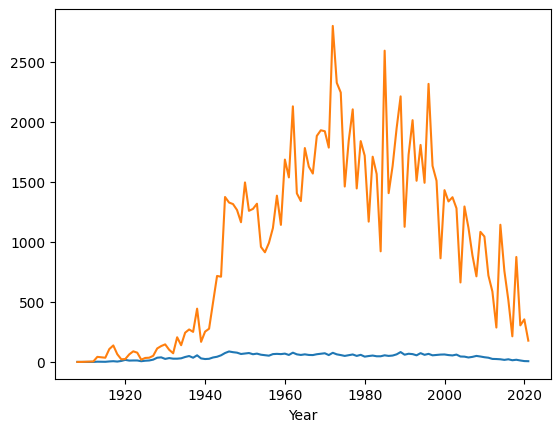

In [ ]:
# Número de accidentes por año
df_accidentes['Year'] = df_accidentes['Date'].dt.year
df_accidentes.groupby('Year').size().plot()

# Número de fatalidades por año
df_accidentes.groupby('Year')['Total_Fatalities'].sum().plot()


In [ ]:
import matplotlib.pyplot as plt

# Número de accidentes por año
df_accidentes['Year'] = df_accidentes['Date'].dt.year

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10,10))  # 2 rows, 1 column, and a figure size of 10x10 inches

# Plot the number of accidents per year
df_accidentes.groupby('Year').size().plot(ax=ax[0])  # specify the axis (ax[0] for the first subplot)
ax[0].set_title('Número de accidentes por año')
ax[0].set_ylabel('Número de accidentes')

# Plot the number of fatalities per year
df_accidentes.groupby('Year')['Total_Fatalities'].sum().plot(ax=ax[1])  # specify the axis (ax[1] for the second subplot)
ax[1].set_title('Número de fatalidades por año')
ax[1].set_ylabel('Número de fatalidades')

# Display the plots
plt.tight_layout()  # Adjusts the space between the plots
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_accidentes['Accident_Summary'].fillna(''))
word_counts = X.sum(axis=0)
word_counts_df = pd.DataFrame({
    'word': vectorizer.get_feature_names(),
    'count': np.asarray(word_counts).ravel()
})
print(word_counts_df.sort_values('count', ascending=False).head(10))


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
# Matriz de correlación
print(df_accidentes.corr())

TypeError: float() argument must be a string or a real number, not 'datetime.time'

TypeError: reduction operation 'argmin' not allowed for this dtype

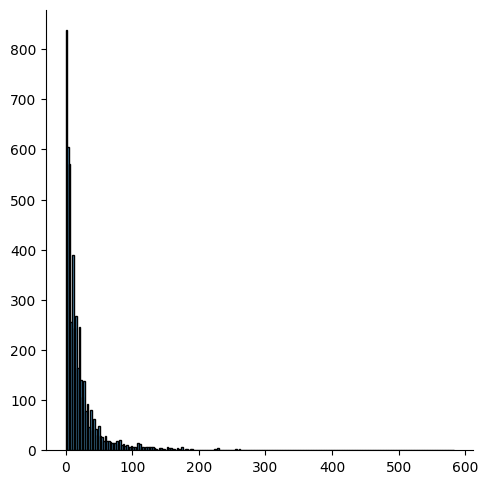

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de fatalidades
sns.displot(df_accidentes['Total_Fatalities'].dropna())
plt.show()

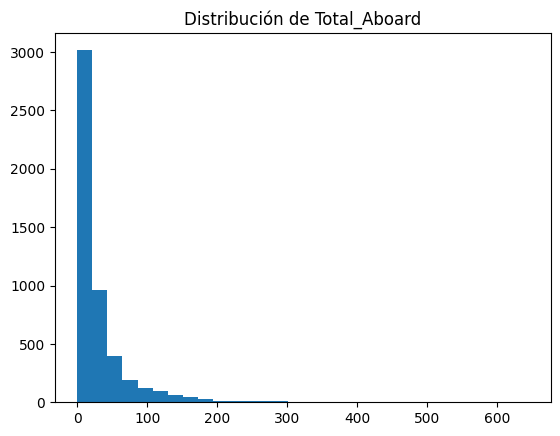

TypeError: float() argument must be a string or a real number, not 'NAType'

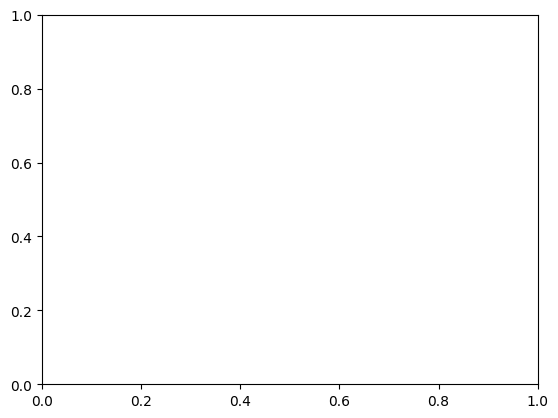

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo: Histograma de Total_Aboard
plt.hist(df_accidentes['Total_Aboard'].dropna(), bins=30)
plt.title('Distribución de Total_Aboard')
plt.show()

# Ejemplo: Gráfico de dispersión entre Total_Aboard y Total_Fatalities
plt.scatter(df_accidentes['Total_Aboard'], df_accidentes['Total_Fatalities'])
plt.title('Total_Aboard vs Total_Fatalities')
plt.xlabel('Total_Aboard')
plt.ylabel('Total_Fatalities')
plt.show()


NameError: name 'plt' is not defined

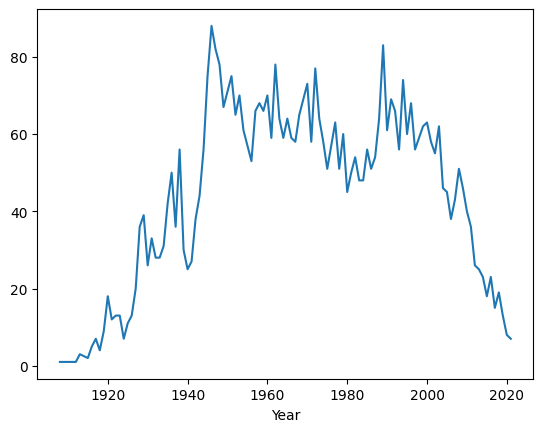

In [ ]:
# Ejemplo: Tendencia de accidentes a lo largo del tiempo
df_accidentes['Year'] = df_accidentes['Date'].dt.year
accidentes_por_año = df_accidentes.groupby('Year').size()
accidentes_por_año.plot()
plt.title('Tendencia de Accidentes a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.show()


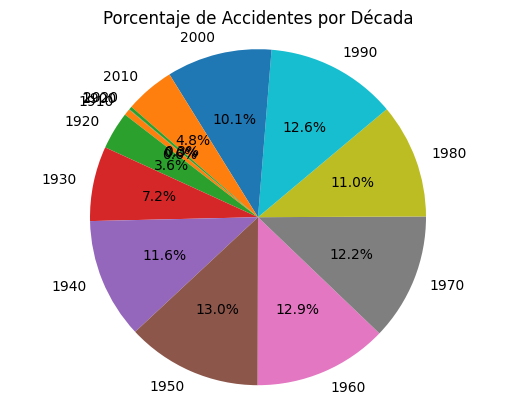

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'Date' está en formato datetime
df_accidentes['Date'] = pd.to_datetime(df_accidentes['Date'])

# Extrae el año de la columna 'Date'
df_accidentes['Year'] = df_accidentes['Date'].dt.year

# Calcula la década a la que pertenece cada año
df_accidentes['Decade'] = (df_accidentes['Year'] // 10) * 10

# Calcula la cantidad de accidentes por década
accidentes_por_decada = df_accidentes.groupby('Decade').size()

# Calcula los porcentajes de accidentes por década
porcentajes_accidentes_por_decada = 100 * (accidentes_por_decada / accidentes_por_decada.sum())

# Crea el gráfico de torta
fig, ax = plt.subplots()
ax.pie(porcentajes_accidentes_por_decada, labels=porcentajes_accidentes_por_decada.index.astype(str), autopct='%1.1f%%', startangle=140)
ax.axis('equal')  # Asegura que el gráfico sea dibujado como un círculo.

# Título del gráfico
plt.title('Porcentaje de Accidentes por Década')

plt.show()


In [ ]:

# Asegúrate de que la columna 'Date' está en formato datetime
df_accidentes['Date'] = pd.to_datetime(df_accidentes['Date'])

# Extrae el año de la columna 'Date'
df_accidentes['Year'] = df_accidentes['Date'].dt.year

# Calcula la década a la que pertenece cada año
df_accidentes['Decade'] = (df_accidentes['Year'] // 10) * 10

# Calcula la cantidad de accidentes por década
accidentes_por_decada = df_accidentes['Decade'].value_counts()

# Ordena las décadas
accidentes_por_decada = accidentes_por_decada.sort_index()

# Calcula los porcentajes de accidentes por década
porcentajes_accidentes_por_decada = 100 * (accidentes_por_decada / accidentes_por_decada.sum())

# Crea un DataFrame con la información
tabla_decadas = pd.DataFrame({'Accidentes': accidentes_por_decada, 'Porcentaje': porcentajes_accidentes_por_decada})

# Reindexa el DataFrame para que el índice sea una columna y no el nombre de las décadas
tabla_decadas.reset_index(inplace=True)

# Renombra las columnas para mayor claridad
tabla_decadas.columns = ['Decada', 'Accidentes', 'Porcentaje']

# Muestra la tabla
print(tabla_decadas)


    Decada  Accidentes  Porcentaje
0     1900           2    0.039936
1     1910          31    0.619010
2     1920         182    3.634185
3     1930         360    7.188498
4     1940         580   11.581470
5     1950         652   13.019169
6     1960         645   12.879393
7     1970         612   12.220447
8     1980         553   11.042332
9     1990         631   12.599840
10    2000         507   10.123802
11    2010         238    4.752396
12    2020          15    0.299521
